# CIFAR-10 - Object Recognition in Images- for beginners

This notebook refers to Kaggle competition "CIFAR-10 - Object Recognition in Images",
which can be found here: https://www.kaggle.com/c/cifar-10 . <br>
It is written for begginers as we were at when we joined the competition. <br>
The notebook was checked on a clean environment and it installs everything needed. <br>
We hope it will help you to get started.  <br>
Feel free to contact us with any question or comment. <br><br>
Maor Vaknin - vaknin.mj@gmail.com <br>
Itay Cohen

### prerequisites

In [1]:
# Installation using Anaconda. You can use Pip instead.

!conda install --yes -c anaconda numpy
!conda install --yes -c anaconda tensorflow-gpu
!conda install --yes -c anaconda pydot
!conda install --yes -c conda-forge matplotlib
!conda install --yes -c conda-forge scikit-learn

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\vakni\Anaconda3\envs\cifar

  added / updated specs:
    - numpy


The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    conda-forge::ca-certificates-2020.12.~ --> anaconda::ca-certificates-2020.10.14-0
  certifi            conda-forge::certifi-2020.12.5-py37h0~ --> anaconda::certifi-2020.6.20-py37_0
  openssl            conda-forge::openssl-1.1.1i-h8ffe710_0 --> anaconda::openssl-1.1.1h-he774522_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done
Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\vakni\Anaconda3\envs\cifar

  added / updated specs:
    - matplotlib


## 1. Data

### This section downloads and builds the data from Keras and installs the needed packages.
### You only need to run it once. If It's not your first run, you can jump to section 2.

We found two versions of the data- <br>
> 1. from Kaggle <br>
> 2. from Kers datasets <br>

The colors in the Kaggle dataset are different from those in the Keras dataset. <br>
However, we found that the Keras dataset is easier to work with, <br>
This notebook uses the Kears dataset in order to make learning easier. <br>

### Prepare the data

In [2]:
# for Keras dataset only
# Loading the dataset from Keras. Note: here we are also given the test labels.
import tensorflow as tf
from tensorflow import keras
data = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

## 2. data exploration

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
train_images.shape

(50000, 32, 32, 3)

In [5]:
test_images.shape

(10000, 32, 32, 3)

The Keras dataset contains: <br>
> 50,000 train images with labels <br>
> 10,000 test Images with labels


In [6]:
print("Number of train images: ", train_images.shape[0])
print("Number of test images: ", test_images.shape[0])

Number of train images:  50000
Number of test images:  10000


The images come in RBG format, 32X32 pixels. Therefore (32,32,3). <br>
There are 50,000 train images and 10,000 test images (in the Keras dataset) <br>
Let's plot some train images with their true labels:

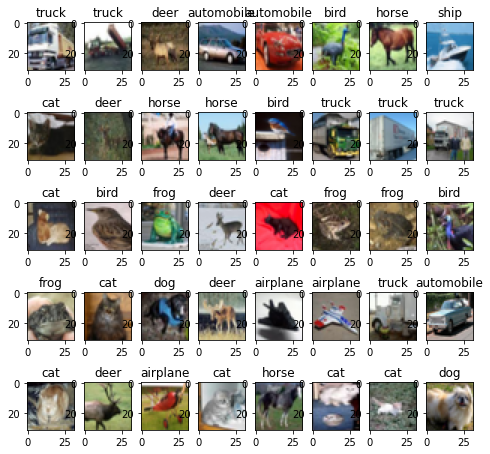

In [7]:
labels_dict =  {0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

fig=plt.figure(figsize=(8, 8))
columns = 8
rows = 5
for i in range(1, columns*rows +1):
    img = train_images[i]
    fig.add_subplot(rows, columns, i, title=labels_dict[int(train_labels[i])])
    plt.imshow(img)
plt.show()

## 3. Build the Model

In [8]:
# Model architecture
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential, datasets,models,layers
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import MaxPooling2D, DepthwiseConv2D, BatchNormalization
from tensorflow.keras.models import load_model

# Data processing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [9]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12872063228360550354
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3142752665
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16648984681322986733
physical_device_desc: "device: 0, name: GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [10]:
# labels_dict_reversed = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

In [11]:
# train_labels['Category'] = train_labels.label.map(labels_dict_reversed)

In [12]:
keras.utils.to_categorical(train_labels)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
# The categories are represented by numbers from 0 to 9.
# Our network needs another representation- a vector of 0's and 1's.
# This function converts the categories to a One-hot vector.
# For example, if the label is 3, then the function will return [0,0,0,1,0,0,0,0,0,0]
train_labels_categories = keras.utils.to_categorical(train_labels)

# Splitting the training data into train set and validation set
x_train, x_val, y_train, y_val = train_test_split(train_images, train_labels_categories, random_state=0, test_size=0.05)
train_labels_categories

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
x_train.shape

(47500, 32, 32, 3)

In [15]:
x_val.shape

(2500, 32, 32, 3)

In order to avoid Overfitting, it is recommended to use augmentation. <br>
For example, we can rotate the image, change the zoom and the centeralization.

In [16]:
# Data augumetation
datagen = ImageDataGenerator(
        rotation_range=0.3,  
        zoom_range = 0.1,  
        width_shift_range=0.1, 
        height_shift_range=0.1,
        horizontal_flip=True)


In [17]:
model_layers = [
    Conv2D(32, (3, 3), activation='relu', strides=(1,1), padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    DepthwiseConv2D(kernel_size=(3,3), strides=(1, 1), padding='same', activation=keras.activations.relu, depth_multiplier=3),
#     MaxPooling2D(2, 2),
    Dropout(rate =0.1),
    
    
    Conv2D(64, (3, 3), activation='relu', strides=(2, 2), padding='same'),
    BatchNormalization(),
    DepthwiseConv2D(kernel_size=(3,3), strides=(1, 1), padding='same', activation=keras.activations.relu),
#     MaxPooling2D(2, 2),
    Dropout(rate = 0.1),
    
    Conv2D(128, (3, 3), activation='relu', strides=(1, 1), padding='same'),
    BatchNormalization(),
    DepthwiseConv2D(kernel_size=(3,3), strides=(1, 1), padding='same', activation=keras.activations.relu),
#     MaxPooling2D(2, 2),
    Dropout(rate = 0.4),
    
    Conv2D(128, (3, 3), activation='relu', strides=(1, 1), padding='same'),
    BatchNormalization(),
    DepthwiseConv2D(kernel_size=(1,1), strides=(1, 1), padding='same', activation=keras.activations.relu),
    
    
    Conv2D(256, (3, 3), activation='relu', strides=(2, 2), padding='same'),
    BatchNormalization(),
    DepthwiseConv2D(kernel_size=(3,3), strides=(1, 1), padding='same', activation=keras.activations.relu),
    
    
    
    Conv2D(512, (1, 1), activation='relu', strides=(2, 2), padding='same'),
    BatchNormalization(),
    DepthwiseConv2D(kernel_size=(1,1), strides=(1, 1), padding='same', activation=keras.activations.relu),
    
#     Conv2D(128, (3, 3), activation='relu', strides=(1, 1), padding='same'),
    
    
    
#     Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), padding='same'),

    
    
    
    
#     MaxPooling2D(2, 2),
    Dropout(rate = 0.4),
    
#     Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), padding='SAME'),
    
#     BatchNormalization(),
    
    Flatten(),
    Dropout(rate = 0.3),
    Dense(2048, activation='relu'),
    Dropout(rate = 0.3),
    Dense(512, activation='relu'),
    Dropout(rate = 0.4),
    Dense(10, activation='softmax')
] 
model = Sequential(model_layers)


In [18]:
# A summary of the model. 
# We can see how many parameters are in each layer and the total number of parameters.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
depthwise_conv2d (DepthwiseC (None, 32, 32, 96)        960       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        55360     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
depthwise_conv2d_1 (Depthwis (None, 16, 16, 64)        6

In [19]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

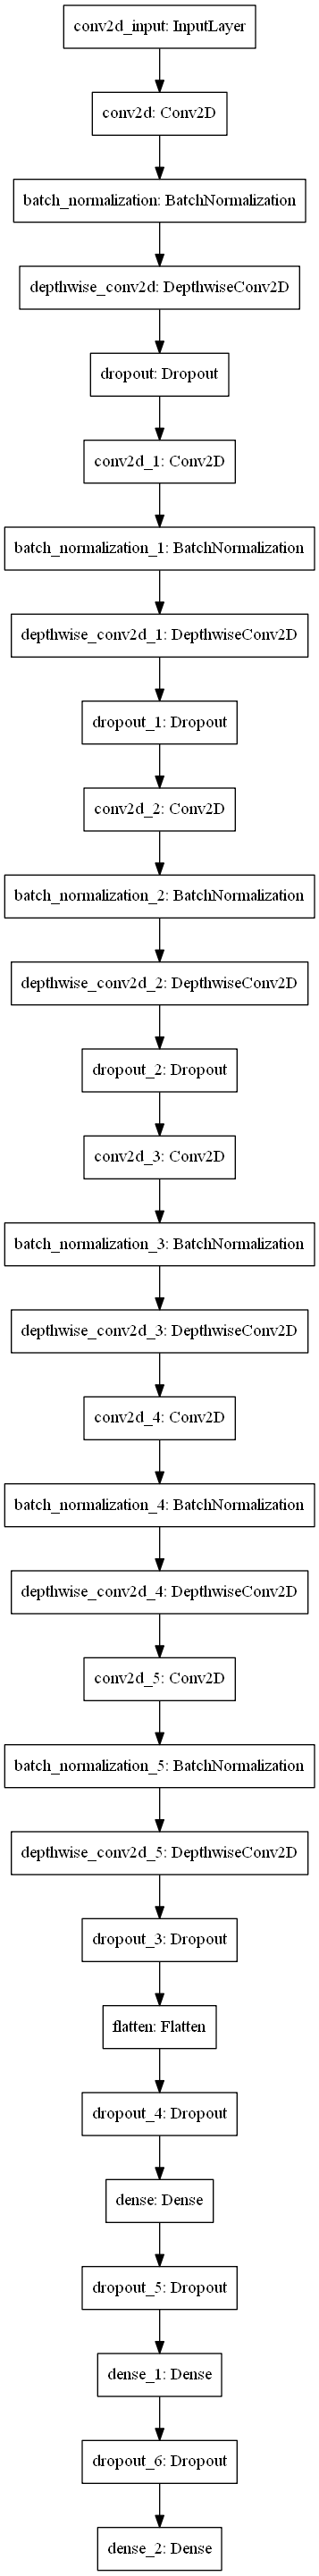

In [20]:
# Visualization of the model
keras.utils.plot_model(model)

In [21]:
# The last epoch does not necessarily produces the best model.
# We want to choose our model wisely,
# so we will save the model that achieved the highest accuracy on the validation set
mcp_save = ModelCheckpoint('best_model', save_best_only=True, monitor='val_accuracy', mode='max')

## 4. Train the model

In [22]:
# Training the model on the augmented train set
model.fit(datagen.flow(x_train, y_train, batch_size=512), validation_data=(x_val, y_val), callbacks=[mcp_save], epochs=50)

  ...
    to  
  ['...']
Train for 93 steps, validate on 2500 samples
Epoch 1/50
92/93 [============================>.] - ETA: 0s - loss: 1.6615 - accuracy: 0.3733WARNING:tensorflow:From C:\Users\vakni\Anaconda3\envs\cifar\lib\site-packages\tensorflow_core\python\ops\resource_variable_ops.py:1786: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: best_model\assets
93/93 [==============================] - 71s 759ms/step - loss: 1.6581 - accuracy: 0.3746 - val_loss: 2.3098 - val_accuracy: 0.0944
Epoch 2/50
93/93 [==============================] - 64s 685ms/step - loss: 1.2158 - accuracy: 0.5562 - val_loss: 2.3193 - val_accuracy: 0.1136
Epoch 3/50
93/93 [==============================] - 67s 721ms/step - loss: 1.0033 - accuracy: 0.6419 - val_loss: 2.2811 - val_accura

93/93 [==============================] - 58s 623ms/step - loss: 0.3006 - accuracy: 0.8960 - val_loss: 0.5570 - val_accuracy: 0.8260
Epoch 43/50
93/93 [==============================] - 70s 751ms/step - loss: 0.2921 - accuracy: 0.8976 - val_loss: 0.3815 - val_accuracy: 0.8752
Epoch 44/50
93/93 [==============================] - 55s 589ms/step - loss: 0.2900 - accuracy: 0.8987 - val_loss: 0.3950 - val_accuracy: 0.8684
Epoch 45/50
93/93 [==============================] - 67s 717ms/step - loss: 0.2848 - accuracy: 0.8989 - val_loss: 0.3795 - val_accuracy: 0.8760
Epoch 46/50
93/93 [==============================] - 55s 589ms/step - loss: 0.2776 - accuracy: 0.9020 - val_loss: 0.4281 - val_accuracy: 0.8604
Epoch 47/50
93/93 [==============================] - 55s 595ms/step - loss: 0.2808 - accuracy: 0.9003 - val_loss: 0.3743 - val_accuracy: 0.8728
Epoch 48/50
93/93 [==============================] - 56s 600ms/step - loss: 0.2702 - accuracy: 0.9045 - val_loss: 0.4764 - val_accuracy: 0.8544
Epoc

We can see that the train accuracy keeps improving but the validation accuracy is not, Which means we are Overfitting the model to the data.

## 5. Predict and evaluate

In [23]:
# Take the best model under the criterion chosen.
# Here we took the model that achieved the highest accuracy on the validation set.
model_ = load_model('best_model', compile=False)

In [24]:
# for Keras dataset only
model.evaluate(test_images, keras.utils.to_categorical(test_labels))

10000/10000 [==============================] - 5s 531us/sample - loss: 0.4035 - accuracy: 0.8721


[0.40345542850494387, 0.8721]

In [25]:
test_predictions = np.argmax(model.predict(test_images), axis=-1)

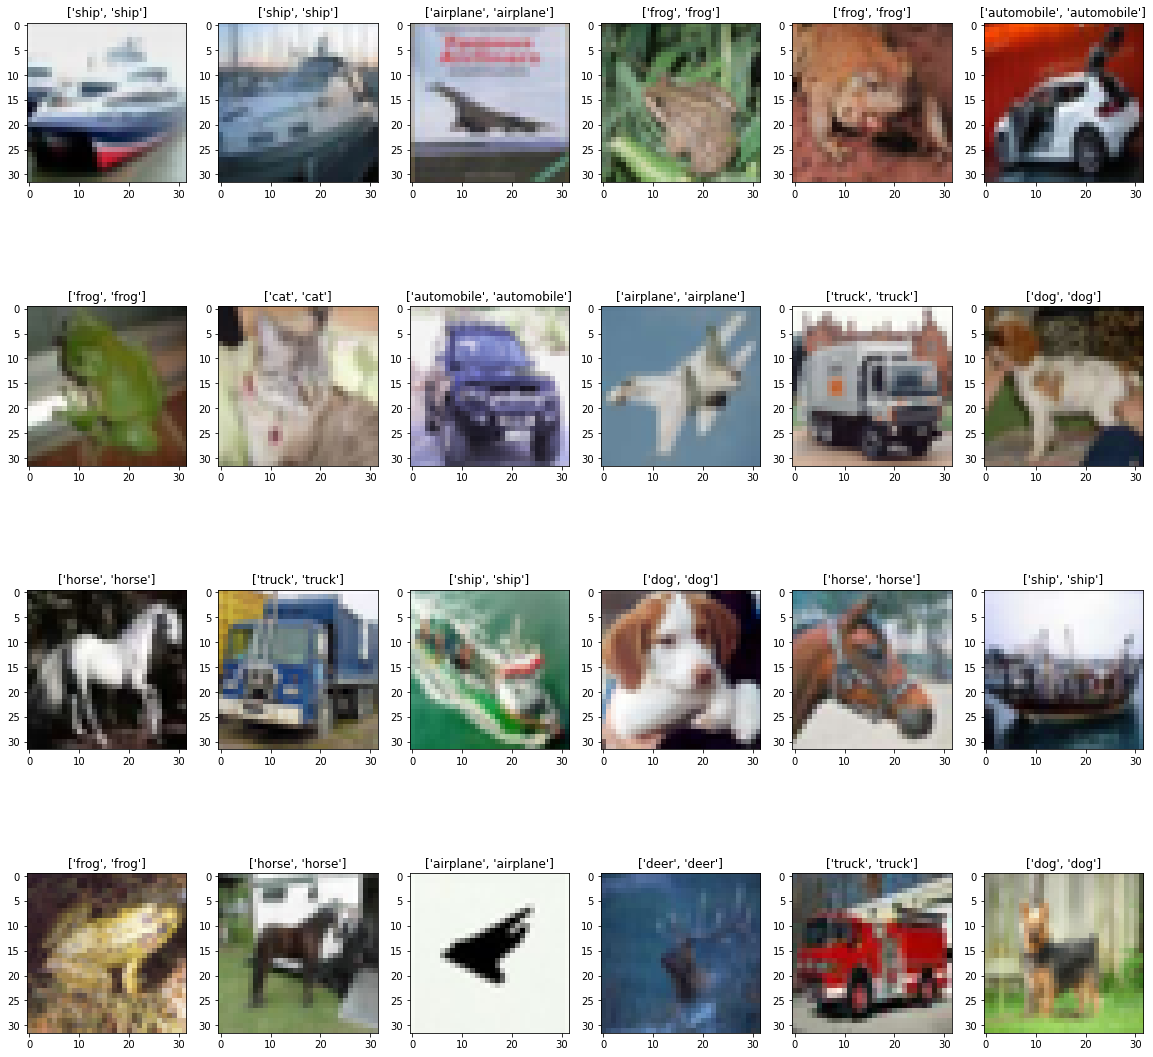

In [26]:
# Let's see how our model predicted some images
columns = 6
rows = 4
fig=plt.figure(figsize=(20, 20))

for i in range(1, columns*rows +1):
    img = test_images[i]
    predicted_label = labels_dict[test_predictions[i]]
    true_label = labels_dict[int(test_labels[i])]
    fig.add_subplot(rows, columns, i, title=[predicted_label, true_label])
    plt.imshow(img)
plt.show()